# Ejercicio 4 - Data Augmentation and Transfer Learning
En el ejercicio anterior, conseguimos un modelo con una tasa de acierto del 72%. Esto fue causado por el número limitado de datos que teníamos, es por eso que durante este ejercicio vamos a ver como podemos crear nuevos datos a partir de los ya existentes. Es por eso que vamos a usar el dataset el ejercicio anterior.

In [1]:
!wget --no-check-certificate \
https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0 \
-O /tmp/cats_and_dogs_small.zip

--2022-07-07 07:51:20--  https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip [following]
--2022-07-07 07:51:20--  https://www.dropbox.com/s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce45e231fa81ce559dba309c769.dl.dropboxusercontent.com/cd/0/inline/BokMuEMxw52FqNIPFkUjVrXZOepOAjw9uLvnFWOB1UFP_1LlqjNKybbUv_AzaMaXoi4FyUp2ZM17y1F4LG3Fv4ihD7CPuK3inoFRbhU07K6_aZ4k6NScXqgMTWHw4qI61EzS6wcazD6roZvfDlprnp5CXALfHrzuCnyMTBRULLbV4Q/file# [following]
--2022-07-07 07:51:21--  https://uce45e231fa81ce559dba309c769.dl.dropboxusercontent.com/cd/0/inline/BokMuEMxw52FqNIPFkUjVrXZOep

In [3]:
import os
import zipfile
local_zip = '/tmp/cats_and_dogs_small.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('.')
zip_ref.close()

base_dir = './cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directorio con las imagenes de training
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')



## Transformaciones de imágenes

Esta técnica es especialmente poderosa para datos de tipoo imagen pero a la vez muy simple, ya que aplica transformaciones sencillas a las imágenes para obtener de nuevas plausibles, que podrían estar en el conjunto de datos original.

En Keras se puede hacer esto de forma muy sencilla usando **ImageDataGenerator**

### Configuración de *ImageGenerator*
Cogiendo de base el modelo presentado en el capítulo anterior, apliquemos
la técnica *Data Augmentation* pasando nuevos argumentos al objeto
ImageGenerator de los datos de entrenamiento. Hay varios parámetros,
nosotros hemos elegido los siguientes para nuestro caso de estudio:


In [ ]:
'''
train_datagen = ImageDataGenerator(
              rescale=1./255,
              rotation_range=40,
              width_shift_range=0.2,
              height_shift_range=0.2,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True,
              fill_mode='nearest')
'''

"\ntrain_datagen = ImageDataGenerator(\n              rescale=1./255,\n              rotation_range=40,\n              width_shift_range=0.2,\n              height_shift_range=0.2,\n              shear_range=0.2,\n              zoom_range=0.2,\n              horizontal_flip=True,\n              fill_mode='nearest')\n"

Una explicación breve de cada uno de ellos es la siguiente:
* *rotation_range* es un valor en grados (0–180) que indica el rango
dentro del cual se pueden rotar imágenes al azar.
* *width_shift* y *height_shift* son rangos (como una fracción del ancho y
la altura total) dentro de los cuales se pueden trasladar las
imágenes al azar verticalmente u horizontalmente.
* *shear_range* sirve para aplicar transformaciones de corte al azar.
* *zoom_range* sirve para aplicar zoom aleatorio dentro de las
imágenes.
* *horizontal_flip* es para voltear aleatoriamente la mitad de las
imágenes horizontalmente (en nuestro caso de estudio no tiene
sentido voltear verticalmente las imágenes).
* *fill_mode* es la estrategia utilizada para rellenar los píxeles recién
creados que pueden aparecer después de una de las
transformaciones anteriores.

Para hacer pruebas y ver como funciona, crearemos nuevas imagenes a partir de la imagen de test que usamos en el ejercicio anterior. Para ello primero debemos cargar la imagen:

In [ ]:
from google.colab import files
uploaded=files.upload() # Nos pide que busquemos las imagenes que quermos en nuestro equipo(.jpg)

Saving gato.jpg to gato.jpg


Una vez cargada, usaremos el siguiente código para hacer las pruebas:

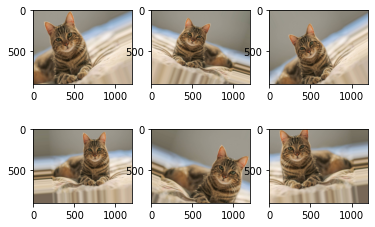

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from tensorflow.keras.preprocessing import image

path = '/content/gato.jpg'
img = image.load_img(path)
data = img_to_array(img)
sample = np.expand_dims(data,axis=0)

# El parametro rescale sirve para dejar los valores de los pixeles entre 0 y 1.
datagen = ImageDataGenerator(
              rescale=1.0/255,
              rotation_range=40,
              width_shift_range=0.2,
              height_shift_range=0.2,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True,
              fill_mode='nearest')

it = datagen.flow(sample,batch_size=1) # Devuelve un array de imagenes
for i in range(6):
  pyplot.subplot(2,3,1 + i)
  batch = it.next()
  image = batch[0]
  pyplot.imshow(image)
pyplot.show()

## Código del caso de estudio 


## Carga de imágenes
Cargamos las imagenes del ejercicio anterior:

In [ ]:
!wget --no-check-certificate \
https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0 \
-O /tmp/cats_and_dogs_small.zip

--2022-04-27 10:31:38--  https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip [following]
--2022-04-27 10:31:39--  https://www.dropbox.com/s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6b3fcb6f31e5950de6f414af2b.dl.dropboxusercontent.com/cd/0/inline/BkJrF7PhFEsddDTP41fx8jMuUV3M1iq4VuO85Q15ng_6LcyLgV09N0aMJqgkNVnxZMPOPXYodFa_Dat58d8bfITj5RuH86oNLKq5-w7G02PDK4YZpV0dR_TlQwb2_j411ZclUyPXZdf9NQ2_ASRgBD-pXeoZztGZ2Pf1tpb593AG0Q/file# [following]
--2022-04-27 10:31:39--  https://uc6b3fcb6f31e5950de6f414af2b.dl.dropboxusercontent.com/cd/0/inline/BkJrF7PhFEsddDTP41fx8jMuUV3

Separamos las imágenes por carpetas:

In [ ]:
import os
import zipfile
local_zip = '/tmp/cats_and_dogs_small.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directorio con las imagenes de training
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

# Comprobamos el numero total de imagenes en cada directorio
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))
print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))
print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))
print('-------------------------------')


total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total test cat images : 500
total test dog images : 500
-------------------------------


## Generación de nuevos datos y entrenamiento

Es importante resaltar que el aumento de datos de imgen generalmente solo se aplica al conjunto de datos de entreneamiento, y no al conjunto de datos de validación o prueba

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

batch = 20
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=batch,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                    batch_size=batch,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    batch_size=batch,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))

                                               

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Creamos el modelo:

In [ ]:
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

# Creamos el modelo
model = tf.keras.models.Sequential([
    # Conv2D -> numero filtros - tamanio de ventana - funcion de activacion - entrada
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(512, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')
 ])

# Compilamos el modelo
model.compile(optimizer=RMSprop(1e-4),
              loss='binary_crossentropy',
              metrics=['acc']) 

Entrenamiento:

In [ ]:
batch_size = 20
steps_per_epoch = train_generator.n / batch_size
validation_steps = validation_generator.n / batch_size

#print('Train_generator.n: ' , train_generator.n)
print('Steps_per_epoch: ',steps_per_epoch)
#print('Validation_generator.n: ' , validation_generator.n)
print('Validation_steps: ', validation_steps)
print('----------------------------')

'''
steps_per_epoch - data_generator puede crear datos de forma infinita, nunca
deberia terminar o devolver algun valor. Como a funcion esta pensada de este forma,
Keras no tiene la habilidad para determinar cuando empieza una epoch y cuando la 
siguiente.
Por lo tanto, calculamos el valor steps_per_epoch como el numero de punto de
datos de entrenamiento, dividido por el tamanio del batch. Una vez que Keras 
aumenta este valor, sabe que es una nueva epoch
'''

history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=2
)

Steps_per_epoch:  100.0
Validation_steps:  50.0
----------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
100/100 - 30s - loss: 0.6965 - acc: 0.5125 - val_loss: 0.6937 - val_acc: 0.5000 - 30s/epoch - 297ms/step
Epoch 2/100
100/100 - 17s - loss: 0.6865 - acc: 0.5555 - val_loss: 0.6686 - val_acc: 0.6100 - 17s/epoch - 168ms/step
Epoch 3/100


KeyboardInterrupt: ignored

## Visualización de los datos de entrenamiento

<Figure size 432x288 with 0 Axes>

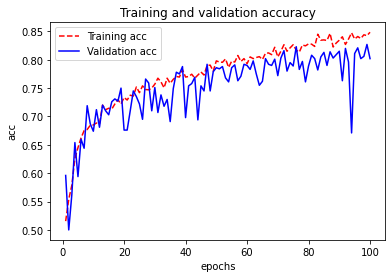

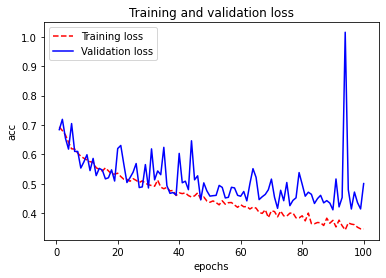

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc'] # Obtenemos los valores de training accuracy 
val_acc = history.history[ 'val_acc' ] # Obtenemos los valores de validation accuracy
loss = history.history['loss'] # Obtenemos los valores de training loss
val_loss = history.history['val_loss' ] # Obtenemos los valores de validation loss

epochs = range(1,len(acc)+1,1)

# Creamos una nueva grafica para el parametro Accuracy
plt.plot (epochs, acc, 'r--', label='Training acc' ) # Mostramos training acc
plt.plot (epochs, val_acc, 'b', label='Validation acc') # Mostramos validation acc
plt.title ('Training and validation accuracy') # Titulo de la grafica
plt.ylabel('acc') # ylabel
plt.xlabel('epochs') # xlabel
plt.legend() # Activamos la leyenda

 # Creamos una nueva grafica para el parametro Loss
plt.figure() # Creamos una nueva grafica
plt.plot (epochs, loss, 'r--', label='Training loss')
plt.plot (epochs, val_loss , 'b', label='Validation loss')
plt.title ('Training and validation loss' )
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend()

## Evalución del modelo

In [ ]:
test_lost, test_acc= model.evaluate_generator(test_generator)
print ("Test Accuracy:", test_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test Accuracy: 0.8059999942779541


# Transfer Learning
En lugar de necesitar entrenar una red neuronal desde cero,
que implica quizás precisar de una gran cantidad de datos y requerir mucho
tiempo (días o semanas) de computación para entrenar, lo hacemos desde
una red preentrenada. Si el conjunto de datos original con el que se entrenó la red neuronal
preentrenada es suficientemente grande y general, entonces la jerarquía
espacial de las características (features) aprendidas por la red preentrenada
permite al modelo preentrenado actuar como un modelo genérico del mundo
visual y, por lo tanto, sus características pueden resultar útiles para muchos
problemas diferentes de visión por computadora, a pesar de que estos nuevos
problemas pueden involucrar clases completamente diferentes a las de la
tarea original.

Específicamente, en el caso de la visión por computador, muchos modelos
previamente entrenados ahora están disponibles públicamente para su descarga y se
pueden usar para crear potentes modelos de visión con muy pocos datos. Esto es lo que vamos a hacer a continuación a nivel de código con un modelo muy popular llamado VGG16.

Hay dos formas de utilizar una red preentrenada: *Feature Extraction* y *Fine-Tuning*

## *Feature Extraction*
Las ConvNet utilizadas para clasificar imágenes se componían de dos partes: primero una serie de capas de convoluciones y pooling, terminando con un clasificador *fully-connected*. La primera parte se llama base convolucional (*convolutional base*) del modelo. En el caso de las ConvNet, la estracción de características consiste en tomar la base convolucional de una red preciamente entrenada, ejecutar los nuevos datos a travéz de ella y entrenar a un nuevo clasificador en la parte de la salida. Recordemos que resulta muy útilo reutilizar la base convolucional porque las características aprendidas por la red preentrenada de donde se ha extraído son mapas de características de conceptos genéricos sobre una imagen, lo que en general resulta "portable" a otros problemas del mismo ámbito.

Lo más interesante para nosotros ahora es que librerías como Keras (y
TensorFlow) nos permiten aplicar esta técnica de una manera muy fácil y
con pocas líneas de código. Keras permite descarga un modelo y luego se
configura cómo este debe ser entrenado, indicando qué capas son entrenables
(*Trainable layers*) y qué capa no (*Frozen layers*). En general se requiere unas
cuantas iteraciones de prueba y error para descubrir la combinación
correcta.

El modelo VGG16, entre otros, viene preempaquetado con Keras. Podemos
importarlo desde el módulo keras.applications:

In [ ]:
from tensorflow.keras.applications import VGG16
pre_trained_model = VGG16(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = 'imagenet')

pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

El primero argumento es la forma de los tensores de imágenes que alimentarán a la red(es un argumento opcional). El seundo es el argumento *include_top* donde se indica si se debe incluir (o no) el clasificador en la última capa de la red. El ´tulimo argumento *weights* indica de dónde se obtiene la información para iniciar los pesos de los parámetros de la red(en nuestro caso usaremos ImageNet).

Ante de entrenar el modelo, es muy importante indicar que las capas de la base convolucional no deben ser entrenadas. Se le denomina "congelar" (*Freeze layers*)

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

En Keras, congelar una capa se realiza estableciendo su atributo *trainable* a False; Además, los modelos los podemos considerar como capas, y por tanto podemos agragar un modelo (como *pre_trained_model*) a un modelo secuencial al igual que agregaríamos una capa:

In [ ]:
modelFE = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

modelFE.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


Como podemos ver, la base convolucional de VGG16 aporta 14.714.688 parámetros ya entrenados, y tan solo deberemos entrenar 2.097.655 parámetros más. Por lo tanto, se trata de un clasificador más simple que el que tenía por defecto VGG16 y si lo comparamos con las capas densas que conforman el clasificador original de VGG16 vemos que el número de parámetros es muchísimo menor (más de 100 millones).

In [ ]:
modelFE.compile(optimizer=RMSprop(1e-4),
              loss='binary_crossentropy',
              metrics=['acc']) 

## Combinando Data Augmentation y Transfer Learning
Ahora ya podemos comenzar a entrar el modelo con el método fit_generation(). Para ello usaremos la misma configuración de *Data Augmentation* usado en el apartado anterior. Pero no es necesariamente siempre la mejor opción y depende del tipo y cantidad de datos disponibles cúal es la mejor combinación de técnicas. Se trata de ir avanazando con *prueba* y *error* en la mayoría de casos

In [ ]:
historyFE = modelFE.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 5,
            validation_steps = validation_steps,
            verbose = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/5
100/100 - 21s - loss: 0.5425 - acc: 0.7165 - val_loss: 0.3232 - val_acc: 0.8630 - 21s/epoch - 211ms/step
Epoch 2/5
100/100 - 19s - loss: 0.4209 - acc: 0.7970 - val_loss: 0.3049 - val_acc: 0.8570 - 19s/epoch - 188ms/step
Epoch 3/5
100/100 - 19s - loss: 0.3766 - acc: 0.8225 - val_loss: 0.3103 - val_acc: 0.8590 - 19s/epoch - 189ms/step
Epoch 4/5
100/100 - 19s - loss: 0.3589 - acc: 0.8395 - val_loss: 0.2529 - val_acc: 0.8980 - 19s/epoch - 190ms/step
Epoch 5/5
100/100 - 19s - loss: 0.3520 - acc: 0.8340 - val_loss: 0.2418 - val_acc: 0.9040 - 19s/epoch - 190ms/step


In [ ]:
import os.path
modelFE.save('./models/modelFE.h5')

<Figure size 432x288 with 0 Axes>

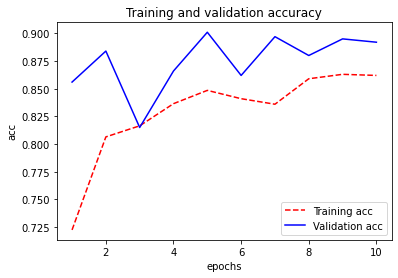

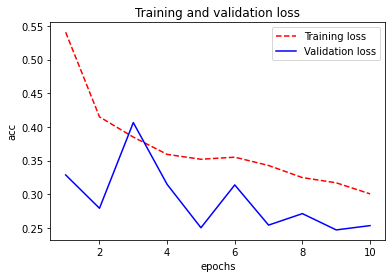

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = historyFE.history['acc'] # Obtenemos los valores de training accuracy 
val_acc = historyFE.history[ 'val_acc' ] # Obtenemos los valores de validation accuracy
loss = historyFE.history['loss'] # Obtenemos los valores de training loss
val_loss = historyFE.history['val_loss' ] # Obtenemos los valores de validation loss

epochs = range(1,len(acc)+1,1)

# Creamos una nueva grafica para el parametro Accuracy
plt.plot (epochs, acc, 'r--', label='Training acc' ) # Mostramos training acc
plt.plot (epochs, val_acc, 'b', label='Validation acc') # Mostramos validation acc
plt.title ('Training and validation accuracy') # Titulo de la grafica
plt.ylabel('acc') # ylabel
plt.xlabel('epochs') # xlabel
plt.legend() # Activamos la leyenda

 # Creamos una nueva grafica para el parametro Loss
plt.figure() # Creamos una nueva grafica
plt.plot (epochs, loss, 'r--', label='Training loss')
plt.plot (epochs, val_loss , 'b', label='Validation loss')
plt.title ('Training and validation loss' )
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend()
plt.figure()

In [ ]:
test_lost, test_acc= modelFE.evaluate_generator(test_generator)
print ("Test Accuracy:", test_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test Accuracy: 0.8820000290870667


Una observación en la que quizás algún lector se fije es que con pocas epochs
el modelo empieza a adaptase mejor a los datos de validación que a los de
entrenamiento. Este es un fenómeno puntual de inicio de entreno, sin
consecuencias en la Accuracy del modelo y es debido a que los datos de
Training, al aplicar Data Augmentation, en las primeras iteraciones los datos que
el modelo ve para entrenar cada vez son nuevos y el modelo le cuesta un poco
más adaptarse a estos datos que a los datos más generales de validación.

## *Fine-Tuning*
Se llama Fine-Tuning en
nuestro entorno porque se trata de un “ajuste fino” de las representaciones
más abstractas del modelo que se está reutilizando como base. Consiste en hacer un
ajuste más fino y entrenar también algunas de las capas finales de la base
convolucional del modelo usado para la extracción de características.

Volviendo a nuestro código del caso de estudio, si nos fijamos en el nombre
que se le asigna a las capas en la base convolucional VGG16 vemos que se
compone de 5 bloques: block1, block2, block3, block4, block5.
Para mostrar al lector la técnica de Fine-Tuning proponemos que en esta
sección entrenemos también el block5 compuesto por tres capas
convolucionales y una de pooling ( block5_conv1, block5_conv2, and
block5_conv3 serán ahora entrenables63). El código en Keras (Python) que nos permite especificar este comportamiento
en la fase de entrenamiento que acabamos de describir puede ser el siguiente:

In [ ]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = 'imagenet')
pre_trained_model.trainable = True
set_trainable = False

for layer in pre_trained_model.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

El detalle relevante de este código es que indica que las capas del block5
deben ser entrenables mediante la asignación del valor True al parámetro
set_trainable de cada capa. Ahora, definamos igual que antes la red:

In [ ]:
modelFT = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
modelFT.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


Ahora ya podemos compilar y entrenar la red. Usaremos los mismos
hiperparámetros, pero es
importante dejar claro, para aquellos que quieran profundizar más en el
tema, que estos hiperparámetros juegan un papel fundamental. Por ejemplo,
en general es una buena práctica usar un *learning rate* muy pequeño para
limitar la magnitud de las modificaciones que se realiza en las tres capas del
block5 que está ajustando. Los learning rate que son demasiado grandes
pueden dañar los pesos previos que venían de la red preentrenada ya que
mantenían información importante para representar a las características.

In [ ]:
modelFT.compile(optimizer=RMSprop(1e-4),
              loss='binary_crossentropy',
              metrics=['acc']) 

historyFT = modelFT.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 20,
            validation_steps = validation_steps,
            verbose = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/20
100/100 - 29s - loss: 0.5237 - acc: 0.7495 - val_loss: 0.2266 - val_acc: 0.9010 - 29s/epoch - 290ms/step
Epoch 2/20
100/100 - 28s - loss: 0.3411 - acc: 0.8510 - val_loss: 0.2111 - val_acc: 0.9150 - 28s/epoch - 276ms/step
Epoch 3/20
100/100 - 28s - loss: 0.2933 - acc: 0.8855 - val_loss: 0.1755 - val_acc: 0.9250 - 28s/epoch - 278ms/step
Epoch 4/20
100/100 - 28s - loss: 0.2621 - acc: 0.8955 - val_loss: 0.2123 - val_acc: 0.9160 - 28s/epoch - 278ms/step
Epoch 5/20
100/100 - 28s - loss: 0.2477 - acc: 0.9035 - val_loss: 0.1677 - val_acc: 0.9400 - 28s/epoch - 277ms/step
Epoch 6/20
100/100 - 28s - loss: 0.2306 - acc: 0.9135 - val_loss: 0.1941 - val_acc: 0.9240 - 28s/epoch - 277ms/step
Epoch 7/20
100/100 - 28s - loss: 0.2041 - acc: 0.9135 - val_loss: 0.2940 - val_acc: 0.9260 - 28s/epoch - 276ms/step
Epoch 8/20
100/100 - 28s - loss: 0.2248 - acc: 0.9175 - val_loss: 0.1714 - val_acc: 0.9350 - 28s/epoch - 275ms/step
Epoch 9/20
100/100 - 28s - loss: 0.2163 - acc: 0.9160 - val_loss: 0.1752

<Figure size 432x288 with 0 Axes>

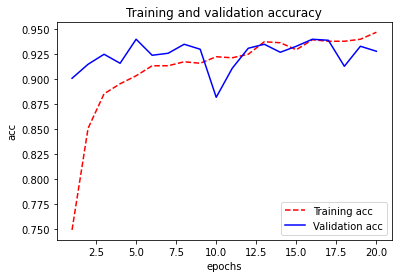

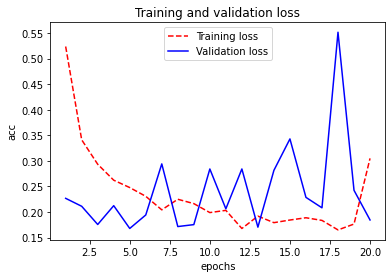

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = historyFT.history['acc'] # Obtenemos los valores de training accuracy 
val_acc = historyFT.history[ 'val_acc' ] # Obtenemos los valores de validation accuracy
loss = historyFT.history['loss'] # Obtenemos los valores de training loss
val_loss = historyFT.history['val_loss' ] # Obtenemos los valores de validation loss

epochs = range(1,len(acc)+1,1)

# Creamos una nueva grafica para el parametro Accuracy
plt.plot (epochs, acc, 'r--', label='Training acc' ) # Mostramos training acc
plt.plot (epochs, val_acc, 'b', label='Validation acc') # Mostramos validation acc
plt.title ('Training and validation accuracy') # Titulo de la grafica
plt.ylabel('acc') # ylabel
plt.xlabel('epochs') # xlabel
plt.legend() # Activamos la leyenda

 # Creamos una nueva grafica para el parametro Loss
plt.figure() # Creamos una nueva grafica
plt.plot (epochs, loss, 'r--', label='Training loss')
plt.plot (epochs, val_loss , 'b', label='Validation loss')
plt.title ('Training and validation loss' )
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend()
plt.figure()

Si nos fijamos en el eje de las Y de la primera gráfica que muestra la Accuracy, ahora podemos considerar que se ha
mejorado, aunque se manifiesta el Overfitting igual que en el modelo anterior
con menos epochs aunque a un nivel de Accuracy es mejor.

Seguramente lo que más le llame la atención al lector son las curvas de Loss
de los datos de validación, que no muestra ninguna mejora real (de hecho, se
está deteriorando) mientras la Accuracy se mantiene estable. Es oportuno este
resultado para aprovechar y explicar qué expresa realmente esta gráfica de
la evolución de la Loss de los datos de validación. En realidad lo que se
muestra es un promedio de valores de Loss puntual; pero lo que importa para
la Accuracy es la distribución de los valores de pérdida, no su promedio, porque
la Accuracy es el resultado de un umbral binario de la probabilidad de clase
predicha por el modelo. El modelo puede seguir mejorando (acaba acertando
en un marco binario indicando que es perro o gato) incluso si esto no se refleja
en la pérdida promedio.

In [ ]:
test_lost, test_acc= modelFT.evaluate_generator(test_generator)
print ("Test Accuracy:", test_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test Accuracy: 0.9290000200271606


Por último, vamos a evaluar con el nuevo modelo si podemos identificar a nuestro gato:

[0.]


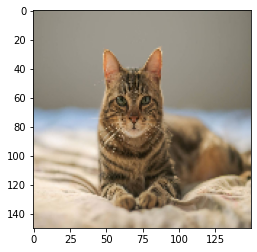

/content/gato.jpg IS A CAT


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

path = '/content/gato.jpg'
img = tf.keras.preprocessing.image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img) # Convierte un imagen PIL a un 3D Numpy array
images = np.expand_dims(x, axis=0)

classes = modelFT.predict(images)
print(classes[0])
plt.imshow(img)
plt.show()

if classes[0]>0:
  print(path + " IS A DOG")
else:
  print(path + " IS A CAT")

**Lo hemos conseguido**

En la práctica, pocas veces se entrena a toda una red neuronal convolucional
(ConvNet) desde cero (es decir, con inicialización de los pesos
aleatoriamente), porque es relativamente difícil tener un conjunto de datos
de tamaño suficiente. En cambio, es común preentrenar un ConvNet en un
conjunto de datos muy grande, y luego usar
esta ConvNet como inicio o como un extractor de características (*features*) fijas
para la tarea de interés usando *Trasfer Learning*